In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dcor

In [2]:
%matplotlib widget

In [3]:
#load data/AllWeathDTypes_NWPP_10yrs.csv as a dataframe
dfX = pd.read_csv("data/AllWeathDTypes_NWPP_10yrs.csv")
dfY = pd.read_csv("data/RTLoad_MIDC+NW_10yrs.csv")
#subtract 7 hours from datetime to convert from UTC to PST
dfY['datetime'] = pd.to_datetime(dfY['datetime'])
dfY['datetime'] = dfY['datetime'] - pd.Timedelta(hours=7)
dfX['datetime'] = pd.to_datetime(dfX['datetime'])
dfX['datetime'] = (dfX['datetime'] - pd.Timedelta(hours=7))

In [4]:
from helpers import totalload

# Use the totalload function to calculate the total load
start_date = '2022-03-01'
end_date = '2025-06-01'
dfY = totalload(dfY, start_date, end_date)

In [5]:
df_XY = pd.merge(dfX, dfY, on='datetime')
df_XY.head()

,datetime,cloudCover,dewpoint,electric_cdd,electric_hdd,gas_cdd,gas_hdd,heatIndex,population_cdd,population_hdd,...,temperature,temperature_avg,temperature_max,temperature_min,weighted_cdd,weighted_hdd,windChill,windDirection,windSpeed,Total Load
0,2022-03-02 00:00:00,77.0,42.0,NaN,NaN,NaN,NaN,49.0,NaN,NaN,...,49.0,NaN,NaN,NaN,NaN,NaN,46.0,129.0,6.0,15502.000000
1,2022-03-02 01:00:00,76.0,42.0,NaN,NaN,NaN,NaN,47.0,NaN,NaN,...,47.0,NaN,NaN,NaN,NaN,NaN,44.0,127.0,6.0,14518.250000
2,2022-03-02 02:00:00,81.0,42.0,NaN,NaN,NaN,NaN,47.0,NaN,NaN,...,47.0,NaN,NaN,NaN,NaN,NaN,44.0,121.0,5.0,13943.250000
3,2022-03-02 03:00:00,86.0,43.0,NaN,NaN,NaN,NaN,47.0,NaN,NaN,...,47.0,NaN,NaN,NaN,NaN,NaN,44.0,104.0,6.0,13651.666667
4,2022-03-02 04:00:00,85.0,42.0,NaN,NaN,NaN,NaN,46.0,NaN,NaN,...,46.0,NaN,NaN,NaN,NaN,NaN,45.0,144.0,3.0,13507.416667


In [6]:
# Extract date and time components from the 'datetime' column
df_XY['year'] = df_XY['datetime'].dt.year
df_XY['month'] = df_XY['datetime'].dt.month
df_XY['date'] = df_XY['datetime'].dt.day
df_XY['day'] = df_XY['datetime'].dt.dayofweek
df_XY['time'] = df_XY['datetime'].dt.hour
#temperature spread = temperature_max - temperature_min
df_XY['temperature_spread'] = df_XY['temperature_max'] - df_XY['temperature_min']

In [11]:
df_numeric.head()

,cloudCover,dewpoint,electric_cdd,heatIndex,relativeHumidity,temperature,windChill,windDirection,windSpeed,Total Load,year,month,date,day,time
0,77.0,42.0,NaN,49.0,79.0,49.0,46.0,129.0,6.0,15502.000000,2022,3,2,2,0
1,76.0,42.0,NaN,47.0,85.0,47.0,44.0,127.0,6.0,14518.250000,2022,3,2,2,1
2,81.0,42.0,NaN,47.0,85.0,47.0,44.0,121.0,5.0,13943.250000,2022,3,2,2,2
3,86.0,43.0,NaN,47.0,87.0,47.0,44.0,104.0,6.0,13651.666667,2022,3,2,2,3
4,85.0,42.0,NaN,46.0,86.0,46.0,45.0,144.0,3.0,13507.416667,2022,3,2,2,4


c:\Users\kumar\anaconda3\envs\MLRuken\Lib\site-packages\dcor\_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(float64, 1d, C), array(int32, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(
c:\Users\kumar\anaconda3\envs\MLRuken\Lib\site-packages\dcor\_dcor_internals.py:188: RuntimeWarning: overflow encountered in scalar multiply
  third_term = a_total_sum * b_total_sum / n_samples


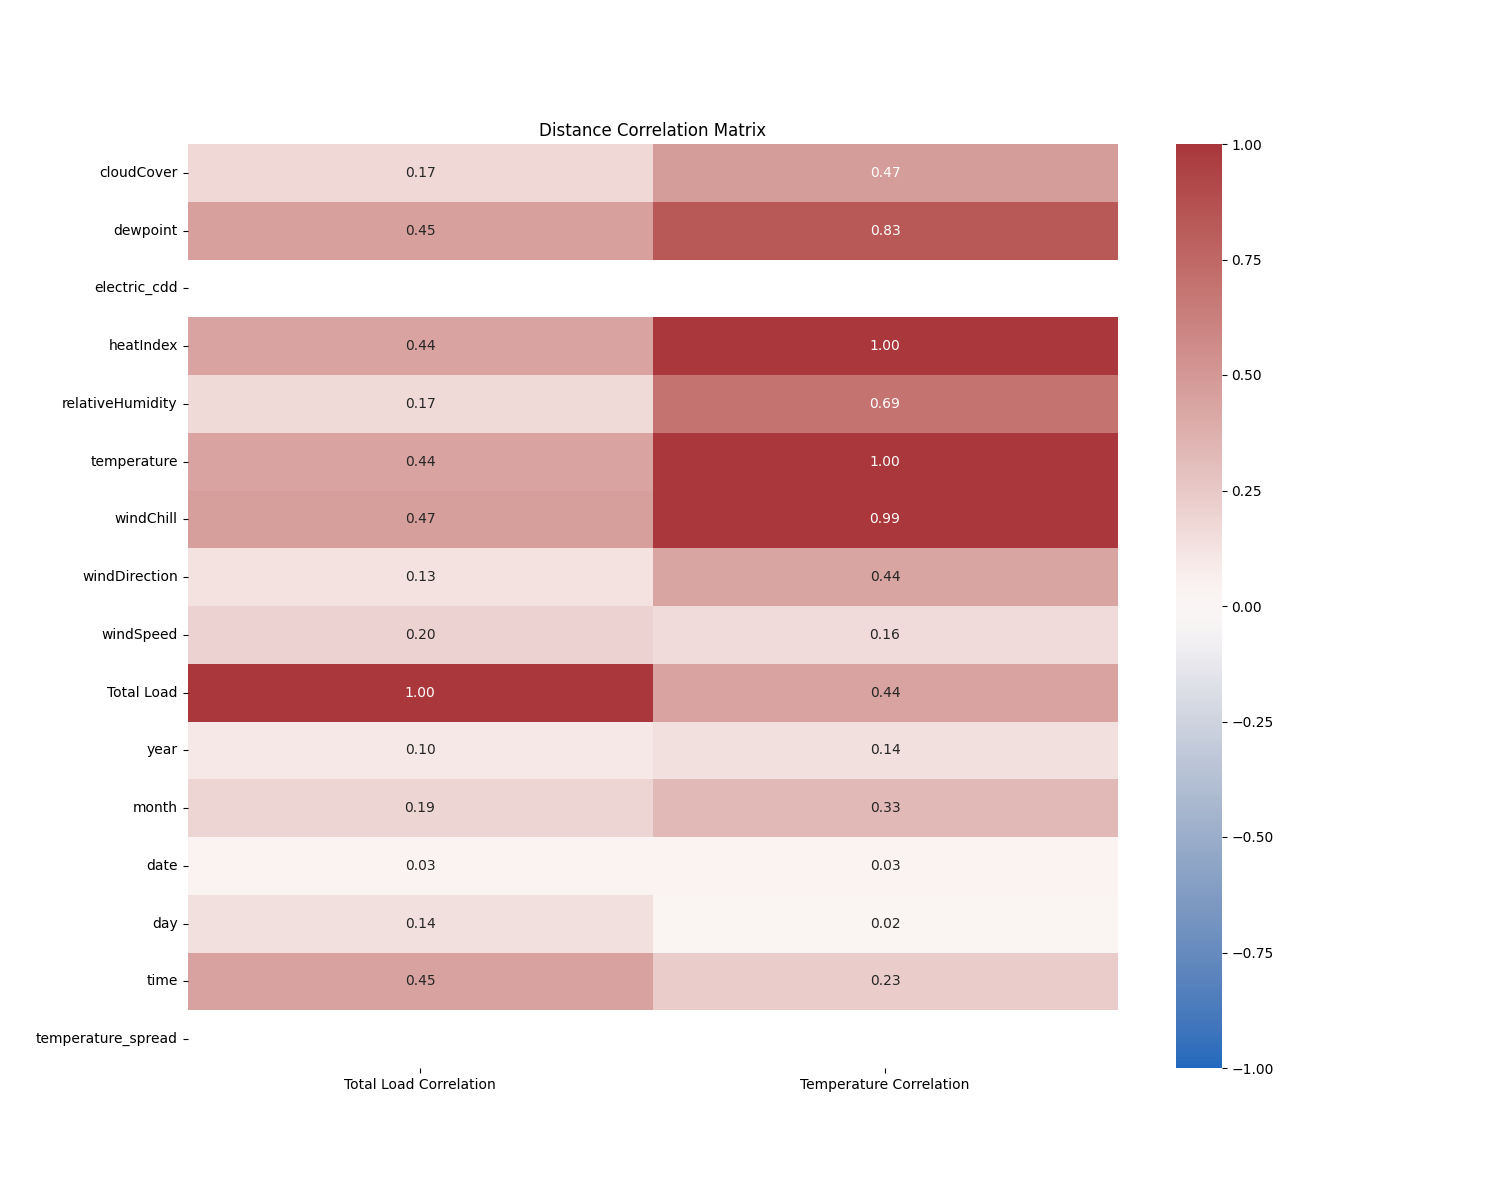

In [7]:
# Drop the original datetime column as it's non-numeric
df_numeric = df_XY.drop(['datetime','electric_hdd','gas_cdd','gas_hdd','population_cdd','population_hdd','temperature_avg','temperature_max','temperature_min','weighted_cdd','weighted_hdd'], axis=1)
# normalise df_numeric['Total Load'] to have mean 0 and standard deviation 1
df_numeric['Total Load'] = (df_numeric['Total Load'] - df_numeric['Total Load'].mean()) / df_numeric['Total Load'].std()
# Calculate the distance correlation matrix
# Note: This can be computationally intensive
dist_corr_total_load = df_numeric.apply(lambda col: dcor.distance_correlation(df_numeric['Total Load'], col))
dist_corr_temperature = df_numeric.apply(lambda col: dcor.distance_correlation(df_numeric['temperature'], col))

dist_corr_matrix = pd.DataFrame({
    'Total Load Correlation': dist_corr_total_load,
    'Temperature Correlation': dist_corr_temperature
})

# Plot the distance correlation matrix as a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(dist_corr_matrix, cmap='vlag', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Distance Correlation Matrix')
plt.show()


In [8]:
#groupby date and get mean of each day
df_daily = df_XY.groupby(df_XY['datetime'].dt.date).mean()

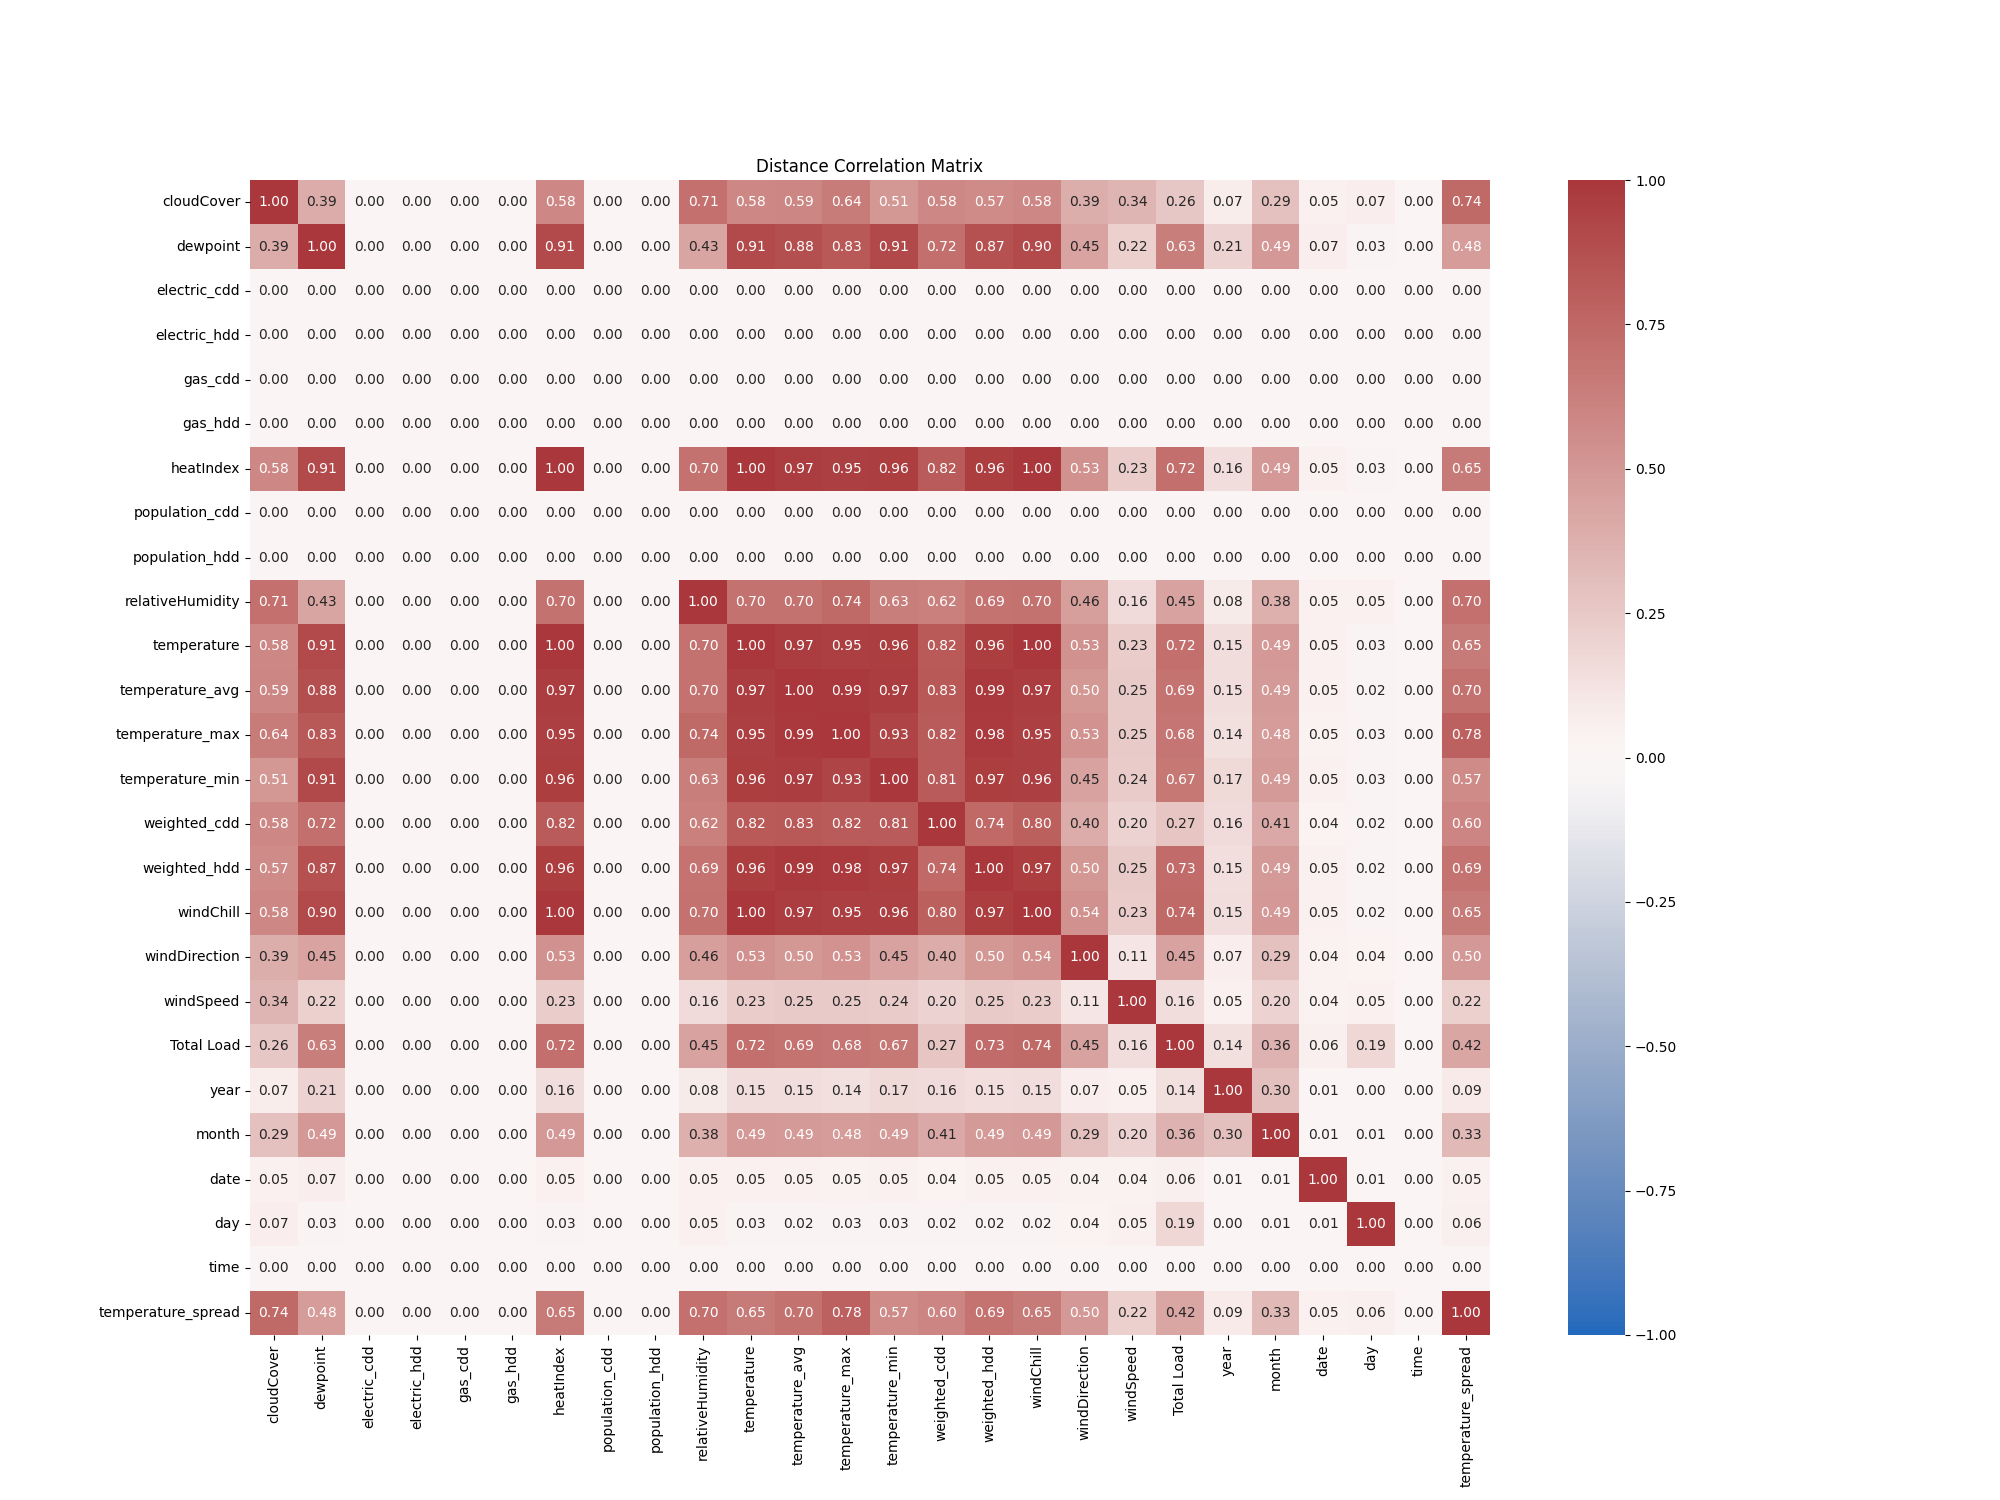

In [9]:
# Calculate the distance correlation matrix of df_daily
# Drop the original datetime column as it's non-numeric
df_numeric = df_daily.drop('datetime', axis=1)
                                
# Calculate the distance correlation matrix
# Note: This can be computationally intensive
dist_corr_matrix = df_numeric.apply(lambda x: df_numeric.apply(lambda y: dcor.distance_correlation(x, y)))

# Plot the distance correlation matrix as a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(dist_corr_matrix, cmap='vlag', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Distance Correlation Matrix')
plt.show()